In [63]:
import pandas as pd
import os

In [64]:
# Definir la ruta al directorio principal que contiene subdirectorios de archivos CSV
main_csv_dir = 'CSVs'

# Definir los nombres de las columnas esperadas
column_names = ["Proveedor", "Fecha", "uuid", "Tipo", "Marca", "Serie", "Modelo2", "Modelo", "Almacenamiento", "ID_Telefonica_Grado", "Grado", "Color", "ID_Dispositivo", "ID", "ID_Telefonica", "ID_Telefonica_Grado_2", "Precio_B", "Precio_C", "Precio_D", "Precio_E", "Precio_PVPR"]

# Inicializar una lista vacía para almacenar DataFrames
df_list = []

# Iterar sobre cada subdirectorio en el directorio principal
for subdir in os.listdir(main_csv_dir):
    subdir_path = os.path.join(main_csv_dir, subdir)
    if os.path.isdir(subdir_path):
        # Leer y concatenar todos los archivos CSV en el subdirectorio actual con codificación 'latin-1'
        for file in os.listdir(subdir_path):
            if file.endswith('.csv'):
                filepath = os.path.join(subdir_path, file)
                df = pd.read_csv(filepath, sep=';', encoding='latin-1', header=None, names=column_names)
                df_list.append(df)

# Concatenar todos los DataFrames
final_df = pd.concat(df_list, ignore_index=True)

# Guardar el DataFrame final en un nuevo archivo CSV con codificación 'latin-1'
final_df.to_csv('CSV_transformaciones/CSV_Unido.csv', sep=';', index=False, encoding='latin-1')

In [65]:
final_df = pd.read_csv('CSV_transformaciones/CSV_Unido.csv', sep=';', encoding='latin-1')
columns_to_drop = ["uuid", "Serie", "Modelo2", "ID_Telefonica_Grado", "ID", "ID_Dispositivo", "ID_Telefonica", "ID_Telefonica_Grado_2", "Color"]
df_filtrado = final_df.drop(columns=columns_to_drop)
df_filtrado.head()
df_filtrado.to_csv('CSV_transformaciones/CSV_Filtrado1.csv', sep=';', index=False, encoding='latin-1')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8168\1724602033.py:1: DtypeWarning: Columns (11,12,13,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv('CSV_transformaciones/CSV_Unido.csv', sep=';', encoding='latin-1')


In [66]:
df_filtrado = pd.read_csv('CSV_transformaciones/CSV_Filtrado1.csv', sep=';', encoding='latin-1')
df_filtrado['Tipo'].unique()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8168\3068456419.py:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtrado = pd.read_csv('CSV_transformaciones/CSV_Filtrado1.csv', sep=';', encoding='latin-1')


array(['SMARTPHONE', 'TABLET', 'LAPTOP', 'SMARTWATCH', 'SOUND', 'GAMING',
       'HOME', nan, 'Xiaomi', 'Apple', 'Samsung', 'Oppo', 'Google',
       'Honor', 'Huawei', 'Motorola', 'OnePlus', 'OP', 'Lenovo', 'HP',
       'Sony', 'Xbox', 'Nintendo', 'Dyson', 'Dell'], dtype=object)

In [67]:
df_smartphones = df_filtrado[df_filtrado['Tipo'] == 'SMARTPHONE']
df_smartphones.to_csv('CSV_transformaciones/CSV_Filtrado2.csv', sep=';', index=False, encoding='latin-1')

In [68]:
df_trade_in = df_smartphones[df_smartphones['Proveedor'] == 'tradein_tph']

In [69]:
df_trade_in = df_trade_in.drop(columns=['Proveedor', 'Grado', 'Tipo'])
df_trade_in.head()

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,Precio_PVPR
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128GB,19.0,12.0,6.0,0.0,0.0
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256GB,320.0,208.0,112.0,16.0,0.0
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256GB,261.0,169.0,91.0,13.0,0.0
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64GB,110.0,71.0,38.0,5.0,0.0
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256GB,296.0,192.0,103.0,14.0,0.0


In [70]:
df_trade_in.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado_Trade_In.csv', sep=';', index=False, encoding='latin-1')

In [71]:
df_smartphones['Proveedor'].unique()

array(['tradein_tph', 'tradeout_bm', 'tradeout_ktuin',
       'tradeout_bm_sin_IsGoodDeal', 'tradeout_bm2', 'tradeout_bm3',
       'ï»¿tradein_tph'], dtype=object)

In [72]:
df_trade_out = df_smartphones[df_smartphones['Proveedor'] != 'tradein_tph']
df_trade_out = df_smartphones[df_smartphones['Proveedor'] != 'ï»¿tradein_tph']
df_trade_out['Proveedor'].unique()

array(['tradein_tph', 'tradeout_bm', 'tradeout_ktuin',
       'tradeout_bm_sin_IsGoodDeal', 'tradeout_bm2', 'tradeout_bm3'],
      dtype=object)

In [73]:
df_trade_out.to_csv('CSV_transformaciones/CSVs_trade_out/CSV_Filtrado_Trade_Out.csv', sep=';', index=False, encoding='latin-1')

In [74]:
df_trade_in = pd.read_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado_Trade_In.csv', sep=';', encoding='latin-1')
df_trade_in.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8168\1023815044.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trade_in = pd.read_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado_Trade_In.csv', sep=';', encoding='latin-1')


,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,Precio_PVPR
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128GB,19.0,12.0,6.0,0.0,0.0
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256GB,320.0,208.0,112.0,16.0,0.0
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256GB,261.0,169.0,91.0,13.0,0.0
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64GB,110.0,71.0,38.0,5.0,0.0
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256GB,296.0,192.0,103.0,14.0,0.0


In [75]:
df_trade_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298652 entries, 0 to 298651
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Fecha           298652 non-null  object 
 1   Marca           298652 non-null  object 
 2   Modelo          298652 non-null  object 
 3   Almacenamiento  298652 non-null  object 
 4   Precio_B        298652 non-null  float64
 5   Precio_C        298646 non-null  float64
 6   Precio_D        298645 non-null  float64
 7   Precio_E        298645 non-null  float64
 8   Precio_PVPR     296139 non-null  object 
dtypes: float64(4), object(5)
memory usage: 20.5+ MB


In [76]:
df_trade_in_null = df_trade_in[df_trade_in['Precio_D'].isnull()]
df_trade_in_null.head()

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,Precio_PVPR
268975,2024-08-22 00:00:09.227414,Xiaomi,Xiaomi Redmi 10C,128GB,128.00,0.0,NaN,NaN,0.0
269499,2024-08-23 00:00:22.954886,Xiaomi,Xiaomi Redmi 10C,128GB,128.00,NaN,NaN,NaN,0.0
270023,2024-08-24 00:00:09.183355,Xiaomi,Xiaomi Redmi 10C,128GB,126.26,NaN,NaN,NaN,0.0
271071,2024-08-26 00:00:09.395777,Xiaomi,Xiaomi Redmi 10C,128GB,128.00,NaN,NaN,NaN,0.0
271595,2024-08-27 00:00:11.103843,Xiaomi,Xiaomi Redmi 10C,128GB,128.00,NaN,NaN,NaN,0.0


In [77]:
df_trade_in["Almacenamiento"] = df_trade_in["Almacenamiento"].str.extract('(\d+)').astype(float)
df_trade_in.head()

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,Precio_PVPR
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128.0,19.0,12.0,6.0,0.0,0.0
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256.0,320.0,208.0,112.0,16.0,0.0
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256.0,261.0,169.0,91.0,13.0,0.0
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64.0,110.0,71.0,38.0,5.0,0.0
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256.0,296.0,192.0,103.0,14.0,0.0


In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Cargar los datos (Asegúrate de tener el DataFrame `df_trade_in` cargado antes de ejecutar)
# df_trade_in = pd.read_csv("tu_archivo.csv")  # Descomentar si estás cargando desde CSV

# Definir las columnas a imputar
columns_to_impute = ['Precio_B', 'Precio_C', 'Precio_D', 'Precio_E', 'Precio_PVPR']
context_features = ['Almacenamiento']  # Variable adicional que ayuda en la imputación

# Convertir a tipo numérico, manejando errores
for column in columns_to_impute:
    df_trade_in[column] = pd.to_numeric(df_trade_in[column], errors='coerce')

# Convertir "Almacenamiento" a numérico (si es categórico con valores tipo "128GB")
df_trade_in["Almacenamiento"] = df_trade_in["Almacenamiento"].astype(str).str.extract('(\d+)').astype(int)

# Combinar las columnas para KNN
columns_for_knn = columns_to_impute + context_features

# Eliminar filas donde todas las columnas relevantes sean NaN
df_trade_in = df_trade_in.dropna(subset=columns_for_knn, how="all")

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_trade_in[columns_to_impute] = imputer.fit_transform(df_trade_in[columns_for_knn])[:, :len(columns_to_impute)]

# Evitar valores negativos en los precios
df_trade_in[columns_to_impute] = np.clip(df_trade_in[columns_to_impute], a_min=0, a_max=None)

# Verificar los resultados
print("✅ Imputación completada con éxito")
print(df_trade_in.head())


✅ Imputación completada con éxito
                        Fecha    Marca             Modelo  Almacenamiento  \
0  2024-10-05 06:00:09.443498   Xiaomi   Xiaomi Redmi 10C             128   
1  2024-10-05 06:00:14.948308    Apple      iPhone 13 Pro             256   
2  2024-10-05 06:00:19.997821    Apple          iPhone 13             256   
3  2024-10-05 06:00:24.827156    Apple          iPhone 11              64   
4  2024-10-05 06:00:29.521591  Samsung  Galaxy Z Fold4 5G             256   

   Precio_B  Precio_C  Precio_D  Precio_E  Precio_PVPR  
0      19.0      12.0       6.0       0.0          0.0  
1     320.0     208.0     112.0      16.0          0.0  
2     261.0     169.0      91.0      13.0          0.0  
3     110.0      71.0      38.0       5.0          0.0  
4     296.0     192.0     103.0      14.0          0.0  


In [79]:
df_trade_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298652 entries, 0 to 298651
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Fecha           298652 non-null  object 
 1   Marca           298652 non-null  object 
 2   Modelo          298652 non-null  object 
 3   Almacenamiento  298652 non-null  int64  
 4   Precio_B        298652 non-null  float64
 5   Precio_C        298652 non-null  float64
 6   Precio_D        298652 non-null  float64
 7   Precio_E        298652 non-null  float64
 8   Precio_PVPR     298652 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 20.5+ MB


In [80]:
df_trade_in['Almacenamiento'].unique()

array([128, 256,  64, 512,  32,   1])

In [81]:
df_almacenamiento_1 = df_trade_in[df_trade_in['Almacenamiento'] == 1]
print(df_almacenamiento_1)

                             Fecha  Marca             Modelo  Almacenamiento  \
103     2024-10-05 06:08:55.351197  Apple      iPhone 14 Pro               1   
106     2024-10-05 06:09:10.233296  Apple  iPhone 14 Pro Max               1   
108     2024-10-05 06:09:19.543267  Apple      iPhone 15 Pro               1   
119     2024-10-05 06:10:15.115320  Apple  iPhone 15 Pro Max               1   
121     2024-10-05 06:10:25.091424  Apple  iPhone 13 Pro Max               1   
...                            ...    ...                ...             ...   
298562  2024-11-03 18:08:33.056392  Apple      iPhone 15 Pro               1   
298573  2024-11-03 18:09:17.403361  Apple  iPhone 15 Pro Max               1   
298575  2024-11-03 18:09:27.142119  Apple  iPhone 13 Pro Max               1   
298577  2024-11-03 18:09:36.105165  Apple          iPhone 13               1   
298593  2024-11-03 18:10:46.096230   Oppo                A38               1   

        Precio_B  Precio_C  Precio_D  P

In [82]:
df_almacenamiento_1['Modelo'].unique()

array(['iPhone 14 Pro', 'iPhone 14 Pro Max', 'iPhone 15 Pro',
       'iPhone 15 Pro Max', 'iPhone 13 Pro Max', 'iPhone 13', 'A38'],
      dtype=object)

In [83]:
total_filas = len(df_almacenamiento_1['Modelo'])
print(f"El número total de filas donde almacenamiento es 1 son: {total_filas}")

El número total de filas donde almacenamiento es 1 son: 2804


In [84]:
total_filas = len(df_almacenamiento_1['Modelo'].unique())
print(f"El número total de modelos unicos son: {total_filas}")

El número total de modelos unicos son: 7


In [85]:
df_trade_in = df_trade_in[df_trade_in['Almacenamiento'] != 1]
df_trade_in['Almacenamiento'].unique()

array([128, 256,  64, 512,  32])

In [86]:
df_trade_in['Precio_PVPR'].unique()

array([   0.   ,   55.8  ,  199.   , 1279.   ,  869.   ,  589.   ,
       1799.   , 1869.   , 1218.42 ,  939.   ,  259.   , 1449.   ,
       1089.   ,  959.   ,  989.   ,  859.   , 1599.   ,  599.   ,
        299.   , 1339.   , 1019.   , 1399.   ,  179.   ,  249.   ,
        799.   ,  809.   ,  749.   ,  399.   , 1039.   ,  319.   ,
        999.   , 1299.   ,  474.54 , 1139.   ,  499.   ,  700.   ,
       1379.   , 1509.   ,  929.   ,  300.   , 1259.   , 1159.   ,
        739.   ,  239.   ,  309.   ,  419.   ,  449.   ,  439.   ,
        509.   ,  489.   ,  659.   ,  729.   , 1290.   ,  395.7  ,
       1349.   ,  639.   ,  759.   ,  979.   , 1109.   , 1457.67 ,
       1359.   ,  909.   ,  529.   ,  379.   ,  349.   , 1389.   ,
       1489.   ,  689.   ,  840.13 ,  459.   ,  221.78 ,  429.   ,
       1598.   ,  609.   ,  559.   , 1000.   , 1250.   ,  279.   ,
         39.8  ,  373.8  ,  199.8  ,   94.908,  291.534,  181.8  ,
        200.   ])

In [87]:
df_trade_in = df_trade_in.drop(columns=['Precio_PVPR'])
df_trade_in.head()

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128,19.0,12.0,6.0,0.0
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256,320.0,208.0,112.0,16.0
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256,261.0,169.0,91.0,13.0
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64,110.0,71.0,38.0,5.0
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256,296.0,192.0,103.0,14.0


In [88]:
filtered_df = df_trade_in[(df_trade_in['Fecha'] == '2024-08-23 00:00:22.954886') & (df_trade_in['Modelo'] == 'Xiaomi Redmi 10C')]
print(filtered_df)

                             Fecha   Marca            Modelo  Almacenamiento  \
269499  2024-08-23 00:00:22.954886  Xiaomi  Xiaomi Redmi 10C             128   

        Precio_B  Precio_C  Precio_D  Precio_E  
269499     128.0      66.4      44.8       6.0  


In [89]:
df_trade_in.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado2_Trade_In.csv', sep=';', index=False, encoding='latin-1')

In [90]:
# Convertir la columna 'Fecha' a datetime
df_trade_in['Fecha'] = pd.to_datetime(df_trade_in['Fecha'])

# Crear nuevas columnas
df_trade_in['dia_semana'] = df_trade_in['Fecha'].dt.dayofweek  # Lunes=0, Domingo=6
df_trade_in['Dia_año'] = df_trade_in['Fecha'].dt.dayofyear
df_trade_in['mes'] = df_trade_in['Fecha'].dt.month

# Verificar los resultados
df_trade_in.head()


,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,dia_semana,Dia_año,mes
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128,19.0,12.0,6.0,0.0,5,279,10
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256,320.0,208.0,112.0,16.0,5,279,10
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256,261.0,169.0,91.0,13.0,5,279,10
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64,110.0,71.0,38.0,5.0,5,279,10
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256,296.0,192.0,103.0,14.0,5,279,10


In [91]:
df_trade_in['Modelo'].unique()

array(['Xiaomi Redmi 10C', 'iPhone 13 Pro', 'iPhone 13', 'iPhone 11',
       'Galaxy Z Fold4 5G', 'Galaxy Z Flip4 5G', 'iPhone 11 Pro Max',
       'Galaxy A13 5G', 'iPhone 14 Pro', 'iPhone 14 Plus', 'iPhone 14',
       'iPhone 14 Pro Max', 'Galaxy A12', 'Xiaomi Redmi Note 10 5G',
       'Galaxy S23 Ultra', 'Galaxy S23', 'Xiaomi 13 Pro 5G', 'A17',
       'Galaxy S23+', 'Galaxy A14 4G', 'Xiaomi Redmi Note 12 Pro 5G',
       'iPhone 12', 'Galaxy S20 FE 5G', 'iPhone 8 Plus', 'iPhone 12 Pro',
       'iPhone SE 2020', 'Xiaomi Redmi Note 9', 'Galaxy Z Fold3 5G',
       'Galaxy Z Flip3 5G', 'Find X3 Lite', 'iPhone 12 Pro Max',
       'Galaxy A52s 5G', 'Xiaomi 11T', 'Xiaomi 11T Pro',
       'iPhone 13 Pro Max', 'iPhone 13 Mini', 'A74 5G', 'iPhone 7',
       'iPhone 7 Plus', 'iPhone X', 'Galaxy A22 5G', 'iPhone XS',
       'iPhone XS Max', 'iPhone XR', 'Galaxy S21+ 5G', 'Galaxy A40',
       'Galaxy S22+ 5G', 'Galaxy S22 Ultra 5G', 'iPhone 11 Pro',
       'Galaxy S20 Ultra 5G', 'Galaxy S20', 'iPh

In [92]:
# Lista de modelos a eliminar
modelos_a_eliminar = [
    'iPad 9 10.2 4G', 'iPad 9 10.2 Wifi', 'iPad 7 10.2 Wifi', 'iPad 10 10.9 Wifi',
    'iPad mini 6 5G', 'iPad mini 6 Wifi', 'iPad Pro 4 11.0 5G', 'iPad Pro 11', 'Pad Air',
    'Galaxy Tab S7 Wifi'
]

# Eliminar las filas donde el modelo esté en la lista
df_trade_in = df_trade_in[~df_trade_in['Modelo'].isin(modelos_a_eliminar)]

# Verificar los resultados
df_trade_in['Modelo'].unique()

array(['Xiaomi Redmi 10C', 'iPhone 13 Pro', 'iPhone 13', 'iPhone 11',
       'Galaxy Z Fold4 5G', 'Galaxy Z Flip4 5G', 'iPhone 11 Pro Max',
       'Galaxy A13 5G', 'iPhone 14 Pro', 'iPhone 14 Plus', 'iPhone 14',
       'iPhone 14 Pro Max', 'Galaxy A12', 'Xiaomi Redmi Note 10 5G',
       'Galaxy S23 Ultra', 'Galaxy S23', 'Xiaomi 13 Pro 5G', 'A17',
       'Galaxy S23+', 'Galaxy A14 4G', 'Xiaomi Redmi Note 12 Pro 5G',
       'iPhone 12', 'Galaxy S20 FE 5G', 'iPhone 8 Plus', 'iPhone 12 Pro',
       'iPhone SE 2020', 'Xiaomi Redmi Note 9', 'Galaxy Z Fold3 5G',
       'Galaxy Z Flip3 5G', 'Find X3 Lite', 'iPhone 12 Pro Max',
       'Galaxy A52s 5G', 'Xiaomi 11T', 'Xiaomi 11T Pro',
       'iPhone 13 Pro Max', 'iPhone 13 Mini', 'A74 5G', 'iPhone 7',
       'iPhone 7 Plus', 'iPhone X', 'Galaxy A22 5G', 'iPhone XS',
       'iPhone XS Max', 'iPhone XR', 'Galaxy S21+ 5G', 'Galaxy A40',
       'Galaxy S22+ 5G', 'Galaxy S22 Ultra 5G', 'iPhone 11 Pro',
       'Galaxy S20 Ultra 5G', 'Galaxy S20', 'iPh

In [93]:
import pandas as pd
from datetime import datetime

# Definir el diccionario de fechas de lanzamiento con meses
fechas_lanzamiento = {
    'Xiaomi Redmi 10C': datetime(2022, 3, 1),
    'iPhone 13 Pro': datetime(2021, 9, 1),
    'iPhone 13': datetime(2021, 9, 1),
    'iPhone 11': datetime(2019, 9, 1),
    'Galaxy Z Fold4 5G': datetime(2022, 8, 1),
    'Galaxy Z Flip4 5G': datetime(2022, 8, 1),
    'iPhone 11 Pro Max': datetime(2019, 9, 1),
    'Galaxy A13 5G': datetime(2021, 12, 1),
    'iPhone 14 Pro': datetime(2022, 9, 1),
    'iPhone 14 Plus': datetime(2022, 9, 1),
    'iPhone 14': datetime(2022, 9, 1),
    'iPhone 14 Pro Max': datetime(2022, 9, 1),
    'Galaxy A12': datetime(2020, 11, 1),
    'Xiaomi Redmi Note 10 5G': datetime(2021, 3, 1),
    'Galaxy S23 Ultra': datetime(2023, 2, 1),
    'Galaxy S23': datetime(2023, 2, 1),
    'Xiaomi 13 Pro 5G': datetime(2022, 12, 1),
    'A17': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy S23+': datetime(2023, 2, 1),
    'Galaxy A14 4G': datetime(2023, 1, 1),
    'Xiaomi Redmi Note 12 Pro 5G': datetime(2022, 10, 1),
    'iPhone 12': datetime(2020, 10, 1),
    'Galaxy S20 FE 5G': datetime(2020, 9, 1),
    'iPhone 8 Plus': datetime(2017, 9, 1),
    'iPhone 12 Pro': datetime(2020, 10, 1),
    'iPhone SE 2020': datetime(2020, 4, 1),
    'Xiaomi Redmi Note 9': datetime(2020, 4, 1),
    'Galaxy Z Fold3 5G': datetime(2021, 8, 1),
    'Galaxy Z Flip3 5G': datetime(2021, 8, 1),
    'Find X3 Lite': datetime(2021, 3, 1),
    'iPhone 12 Pro Max': datetime(2020, 10, 1),
    'Galaxy A52s 5G': datetime(2021, 8, 1),
    'Xiaomi 11T': datetime(2021, 9, 1),
    'Xiaomi 11T Pro': datetime(2021, 9, 1),
    'iPhone 13 Pro Max': datetime(2021, 9, 1),
    'iPhone 13 Mini': datetime(2021, 9, 1),
    'A74 5G': datetime(2021, 4, 1),
    'iPhone 7': datetime(2016, 9, 1),
    'iPhone 7 Plus': datetime(2016, 9, 1),
    'iPhone X': datetime(2017, 11, 1),
    'Galaxy A22 5G': datetime(2021, 6, 1),
    'iPhone XS': datetime(2018, 9, 1),
    'iPhone XS Max': datetime(2018, 9, 1),
    'iPhone XR': datetime(2018, 10, 1),
    'Galaxy S21+ 5G': datetime(2021, 1, 1),
    'Galaxy A40': datetime(2019, 3, 1),
    'Galaxy S22+ 5G': datetime(2022, 2, 1),
    'Galaxy S22 Ultra 5G': datetime(2022, 2, 1),
    'iPhone 11 Pro': datetime(2019, 9, 1),
    'Galaxy S20 Ultra 5G': datetime(2020, 2, 1),
    'Galaxy S20': datetime(2020, 2, 1),
    'iPhone SE 2022': datetime(2022, 3, 1),
    'Xiaomi Redmi Note 11': datetime(2022, 1, 1),
    'Find X5 5G': datetime(2022, 2, 1),
    'iPhone 8': datetime(2017, 9, 1),
    'iPhone 12 Mini': datetime(2020, 10, 1),
    'Galaxy S21 5G': datetime(2021, 1, 1),
    'Galaxy A53 5G': datetime(2022, 3, 1),
    'Galaxy A13': datetime(2021, 12, 1),
    'Reno8 Lite 5G': datetime(2022, 5, 1),
    'Galaxy S21 Ultra 5G': datetime(2021, 1, 1),
    'Galaxy S20 5G': datetime(2020, 2, 1),
    'Xiaomi Redmi Note 8 Pro': datetime(2019, 8, 1),
    'iPhone 15 Pro': datetime(2023, 9, 1),
    'iPhone 15 Plus': datetime(2023, 9, 1),
    'iPhone 15': datetime(2023, 9, 1),
    'iPhone 15 Pro Max': datetime(2023, 9, 1),
    'Pixel 8 Pro': datetime(2023, 10, 1),
    'Honor 50': datetime(2021, 6, 1),
    '70 5G': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'X8': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'P30 Lite': datetime(2019, 3, 1),
    'Moto G14': datetime(2023, 8, 1),
    'Razr 40 Ultra': datetime(2023, 6, 1),
    '12': datetime(2020, 1, 1),  # Año de lanzamiento no encontrado
    'A38': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Find N2 Flip 5G': datetime(2023, 2, 1),
    'Reno8 Pro 5G': datetime(2022, 7, 1),
    'Galaxy S10+': datetime(2019, 3, 1),
    'Galaxy A05s': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy A25': datetime(2024, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy A31': datetime(2020, 3, 1),
    'Galaxy A32 5G': datetime(2021, 1, 1),
    'Galaxy A51': datetime(2019, 12, 1),
    'Galaxy A52 5G': datetime(2021, 3, 1),
    'Galaxy Note 20 5G': datetime(2020, 8, 1),
    'Galaxy S23 FE': datetime(2023, 10, 1),
    'Galaxy S24': datetime(2024, 1, 1),
    'Galaxy S24 Ultra': datetime(2024, 1, 1),
    'Galaxy S24+': datetime(2024, 1, 1),
    'Galaxy S7': datetime(2016, 3, 1),
    'Xiaomi 12 Pro': datetime(2021, 12, 1),
    'Xiaomi 13 5G': datetime(2022, 12, 1),
    'Xiaomi Mi 11 Lite 5G': datetime(2021, 3, 1),
    'Xiaomi Mi 11i': datetime(2021, 4, 1),
    'Xiaomi Redmi 12 5G': datetime(2023, 7, 1),
    'Redmi 13C': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Xiaomi Redmi Note 10 Pro': datetime(2021, 3, 1),
    'Xiaomi Redmi Note 10S': datetime(2021, 3, 1),
    'Xiaomi Redmi Note 13 4G': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Redmi Note 13 Pro': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Redmi Note 13 Pro+': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Xiaomi Redmi Note 8T': datetime(2019, 11, 1),
    'A57s': datetime(2022, 1, 1),
    'A78 5G': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy S21 FE': datetime(2022, 1, 1),
    'Galaxy S22 5G': datetime(2022, 2, 1)
}

# Crear la columna 'fecha_lanzamiento' en el DataFrame df_trade_in
df_trade_in['fecha_lanzamiento'] = df_trade_in['Modelo'].map(fechas_lanzamiento)

# Calcular hace cuántos días se lanzaron los móviles
df_trade_in['dias_desde_lanzamiento'] = (pd.to_datetime(df_trade_in['Fecha']) - df_trade_in['fecha_lanzamiento']).dt.days

# Mostrar las primeras filas del DataFrame para verificar
df_trade_in.head()


,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,dia_semana,Dia_año,mes,fecha_lanzamiento,dias_desde_lanzamiento
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128,19.0,12.0,6.0,0.0,5,279,10,2022-03-01,949
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256,320.0,208.0,112.0,16.0,5,279,10,2021-09-01,1130
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256,261.0,169.0,91.0,13.0,5,279,10,2021-09-01,1130
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64,110.0,71.0,38.0,5.0,5,279,10,2019-09-01,1861
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256,296.0,192.0,103.0,14.0,5,279,10,2022-08-01,796


In [94]:
import pandas as pd
from datetime import datetime
import csv

# Definir el diccionario de fechas de lanzamiento con meses
fechas_lanzamiento = {
    'Xiaomi Redmi 10C': datetime(2022, 3, 1),
    'iPhone 13 Pro': datetime(2021, 9, 1),
    'iPhone 13': datetime(2021, 9, 1),
    'iPhone 11': datetime(2019, 9, 1),
    'Galaxy Z Fold4 5G': datetime(2022, 8, 1),
    'Galaxy Z Flip4 5G': datetime(2022, 8, 1),
    'iPhone 11 Pro Max': datetime(2019, 9, 1),
    'Galaxy A13 5G': datetime(2021, 12, 1),
    'iPhone 14 Pro': datetime(2022, 9, 1),
    'iPhone 14 Plus': datetime(2022, 9, 1),
    'iPhone 14': datetime(2022, 9, 1),
    'iPhone 14 Pro Max': datetime(2022, 9, 1),
    'Galaxy A12': datetime(2020, 11, 1),
    'Xiaomi Redmi Note 10 5G': datetime(2021, 3, 1),
    'Galaxy S23 Ultra': datetime(2023, 2, 1),
    'Galaxy S23': datetime(2023, 2, 1),
    'Xiaomi 13 Pro 5G': datetime(2022, 12, 1),
    'A17': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy S23+': datetime(2023, 2, 1),
    'Galaxy A14 4G': datetime(2023, 1, 1),
    'Xiaomi Redmi Note 12 Pro 5G': datetime(2022, 10, 1),
    'iPhone 12': datetime(2020, 10, 1),
    'Galaxy S20 FE 5G': datetime(2020, 9, 1),
    'iPhone 8 Plus': datetime(2017, 9, 1),
    'iPhone 12 Pro': datetime(2020, 10, 1),
    'iPhone SE 2020': datetime(2020, 4, 1),
    'Xiaomi Redmi Note 9': datetime(2020, 4, 1),
    'Galaxy Z Fold3 5G': datetime(2021, 8, 1),
    'Galaxy Z Flip3 5G': datetime(2021, 8, 1),
    'Find X3 Lite': datetime(2021, 3, 1),
    'iPhone 12 Pro Max': datetime(2020, 10, 1),
    'Galaxy A52s 5G': datetime(2021, 8, 1),
    'Xiaomi 11T': datetime(2021, 9, 1),
    'Xiaomi 11T Pro': datetime(2021, 9, 1),
    'iPhone 13 Pro Max': datetime(2021, 9, 1),
    'iPhone 13 Mini': datetime(2021, 9, 1),
    'A74 5G': datetime(2021, 4, 1),
    'iPhone 7': datetime(2016, 9, 1),
    'iPhone 7 Plus': datetime(2016, 9, 1),
    'iPhone X': datetime(2017, 11, 1),
    'Galaxy A22 5G': datetime(2021, 6, 1),
    'iPhone XS': datetime(2018, 9, 1),
    'iPhone XS Max': datetime(2018, 9, 1),
    'iPhone XR': datetime(2018, 10, 1),
    'Galaxy S21+ 5G': datetime(2021, 1, 1),
    'Galaxy A40': datetime(2019, 3, 1),
    'Galaxy S22+ 5G': datetime(2022, 2, 1),
    'Galaxy S22 Ultra 5G': datetime(2022, 2, 1),
    'iPhone 11 Pro': datetime(2019, 9, 1),
    'Galaxy S20 Ultra 5G': datetime(2020, 2, 1),
    'Galaxy S20': datetime(2020, 2, 1),
    'iPhone SE 2022': datetime(2022, 3, 1),
    'Xiaomi Redmi Note 11': datetime(2022, 1, 1),
    'Find X5 5G': datetime(2022, 2, 1),
    'iPhone 8': datetime(2017, 9, 1),
    'iPhone 12 Mini': datetime(2020, 10, 1),
    'Galaxy S21 5G': datetime(2021, 1, 1),
    'Galaxy A53 5G': datetime(2022, 3, 1),
    'Galaxy A13': datetime(2021, 12, 1),
    'Reno8 Lite 5G': datetime(2022, 5, 1),
    'Galaxy S21 Ultra 5G': datetime(2021, 1, 1),
    'Galaxy S20 5G': datetime(2020, 2, 1),
    'Xiaomi Redmi Note 8 Pro': datetime(2019, 8, 1),
    'iPhone 15 Pro': datetime(2023, 9, 1),
    'iPhone 15 Plus': datetime(2023, 9, 1),
    'iPhone 15': datetime(2023, 9, 1),
    'iPhone 15 Pro Max': datetime(2023, 9, 1),
    'Pixel 8 Pro': datetime(2023, 10, 1),
    'Honor 50': datetime(2021, 6, 1),
    '70 5G': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'X8': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'P30 Lite': datetime(2019, 3, 1),
    'Moto G14': datetime(2023, 8, 1),
    'Razr 40 Ultra': datetime(2023, 6, 1),
    '12': datetime(2020, 1, 1),  # Año de lanzamiento no encontrado
    'A38': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Find N2 Flip 5G': datetime(2023, 2, 1),
    'Reno8 Pro 5G': datetime(2022, 7, 1),
    'Galaxy S10+': datetime(2019, 3, 1),
    'Galaxy A05s': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy A25': datetime(2024, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy A31': datetime(2020, 3, 1),
    'Galaxy A32 5G': datetime(2021, 1, 1),
    'Galaxy A51': datetime(2019, 12, 1),
    'Galaxy A52 5G': datetime(2021, 3, 1),
    'Galaxy Note 20 5G': datetime(2020, 8, 1),
    'Galaxy S23 FE': datetime(2023, 10, 1),
    'Galaxy S24': datetime(2024, 1, 1),
    'Galaxy S24 Ultra': datetime(2024, 1, 1),
    'Galaxy S24+': datetime(2024, 1, 1),
    'Galaxy S7': datetime(2016, 3, 1),
    'Xiaomi 12 Pro': datetime(2021, 12, 1),
    'Xiaomi 13 5G': datetime(2022, 12, 1),
    'Xiaomi Mi 11 Lite 5G': datetime(2021, 3, 1),
    'Xiaomi Mi 11i': datetime(2021, 4, 1),
    'Xiaomi Redmi 12 5G': datetime(2023, 7, 1),
    'Redmi 13C': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Xiaomi Redmi Note 10 Pro': datetime(2021, 3, 1),
    'Xiaomi Redmi Note 10S': datetime(2021, 3, 1),
    'Xiaomi Redmi Note 13 4G': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Redmi Note 13 Pro': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Redmi Note 13 Pro+': datetime(2023, 1, 1),  # Año de lanzamiento no encontrado
    'Xiaomi Redmi Note 8T': datetime(2019, 11, 1),
    'A57s': datetime(2022, 1, 1),
    'A78 5G': datetime(2022, 1, 1),  # Año de lanzamiento no encontrado
    'Galaxy S21 FE': datetime(2022, 1, 1),
    'Galaxy S22 5G': datetime(2022, 2, 1)
}

# Convertir el diccionario a un archivo CSV
with open('CSV_transformaciones/CSVs_trade_in/fechas_lanzamiento.csv', mode='w', newline='', encoding='latin-1') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerow(['Modelo', 'Fecha de Lanzamiento'])
    for modelo, fecha in fechas_lanzamiento.items():
        writer.writerow([modelo, fecha])

In [95]:
# Eliminar la columna 'fecha_lanzamiento'
df_trade_in = df_trade_in.drop(columns=['fecha_lanzamiento'])

# Cambiar el nombre de la columna 'dias_desde_lanzamiento' a 'fecha_lanzamiento'
df_trade_in = df_trade_in.rename(columns={'dias_desde_lanzamiento': 'fecha_lanzamiento'})

# Verificar los resultados
df_trade_in.head()

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,dia_semana,Dia_año,mes,fecha_lanzamiento
0,2024-10-05 06:00:09.443498,Xiaomi,Xiaomi Redmi 10C,128,19.0,12.0,6.0,0.0,5,279,10,949
1,2024-10-05 06:00:14.948308,Apple,iPhone 13 Pro,256,320.0,208.0,112.0,16.0,5,279,10,1130
2,2024-10-05 06:00:19.997821,Apple,iPhone 13,256,261.0,169.0,91.0,13.0,5,279,10,1130
3,2024-10-05 06:00:24.827156,Apple,iPhone 11,64,110.0,71.0,38.0,5.0,5,279,10,1861
4,2024-10-05 06:00:29.521591,Samsung,Galaxy Z Fold4 5G,256,296.0,192.0,103.0,14.0,5,279,10,796


In [96]:
df_trade_in['fecha_lanzamiento'].unique() 

array([ 949, 1130, 1861, ..., 2985, 2255, 3169], shape=(2655,))

In [97]:
df_trade_in.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado3_Trade_In.csv', sep=';', index=False, encoding='latin-1')

In [98]:
# Crear un nuevo DataFrame con la columna 'Modelo'
df_modelo_REF = df_trade_in[['Modelo']].drop_duplicates().reset_index(drop=True)

# Añadir la columna 'Modelo_NUM' con números únicos empezando por 1
df_modelo_REF['Modelo_NUM'] = range(1, len(df_modelo_REF) + 1)

# Mostrar el nuevo DataFrame
df_modelo_REF.head()

,Modelo,Modelo_NUM
0,Xiaomi Redmi 10C,1
1,iPhone 13 Pro,2
2,iPhone 13,3
3,iPhone 11,4
4,Galaxy Z Fold4 5G,5


In [99]:
df_modelo_REF.tail()

,Modelo,Modelo_NUM
101,Xiaomi Redmi Note 8T,102
102,A57s,103
103,A78 5G,104
104,Galaxy S21 FE,105
105,Galaxy S22 5G,106


In [100]:
df_modelo_REF.to_csv('CSV_transformaciones/CSVs_trade_in/Modelo_REF.csv', sep=';', index=False, encoding='latin-1')

In [101]:
# Crear un nuevo DataFrame con las columnas 'Marca' y 'Modelo'
df_marca_modelo_REF = df_trade_in[['Marca', 'Modelo']].drop_duplicates().reset_index(drop=True)

# Mostrar el nuevo DataFrame
df_marca_modelo_REF.head()

,Marca,Modelo
0,Xiaomi,Xiaomi Redmi 10C
1,Apple,iPhone 13 Pro
2,Apple,iPhone 13
3,Apple,iPhone 11
4,Samsung,Galaxy Z Fold4 5G


In [102]:
df_marca_modelo_REF.to_csv('CSV_transformaciones/CSVs_trade_in/Marca_Modelo_REF.csv', sep=';', index=False, encoding='latin-1')

In [103]:
# Crear un diccionario de mapeo de Modelo a Modelo_NUM
modelo_to_num = df_modelo_REF.set_index('Modelo')['Modelo_NUM'].to_dict()

# Mapear los valores de Modelo a Modelo_NUM en df_trade_in
df_trade_in['Modelo'] = df_trade_in['Modelo'].map(modelo_to_num)

# Verificar los resultados
df_trade_in.head(20)

,Fecha,Marca,Modelo,Almacenamiento,Precio_B,Precio_C,Precio_D,Precio_E,dia_semana,Dia_año,mes,fecha_lanzamiento
0,2024-10-05 06:00:09.443498,Xiaomi,1,128,19.0,12.0,6.0,0.0,5,279,10,949
1,2024-10-05 06:00:14.948308,Apple,2,256,320.0,208.0,112.0,16.0,5,279,10,1130
2,2024-10-05 06:00:19.997821,Apple,3,256,261.0,169.0,91.0,13.0,5,279,10,1130
3,2024-10-05 06:00:24.827156,Apple,4,64,110.0,71.0,38.0,5.0,5,279,10,1861
4,2024-10-05 06:00:29.521591,Samsung,5,256,296.0,192.0,103.0,14.0,5,279,10,796
5,2024-10-05 06:00:34.191220,Samsung,5,512,311.0,202.0,108.0,15.0,5,279,10,796
6,2024-10-05 06:00:39.123248,Samsung,6,256,158.0,102.0,55.0,7.0,5,279,10,796
7,2024-10-05 06:00:43.655718,Apple,7,64,175.0,113.0,61.0,8.0,5,279,10,1861
8,2024-10-05 06:00:48.277769,Samsung,8,128,24.0,15.0,8.0,1.0,5,279,10,1039
9,2024-10-05 06:00:53.095240,Apple,9,256,440.0,286.0,154.0,22.0,5,279,10,765


In [104]:
df_trade_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294561 entries, 0 to 298640
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Fecha              294561 non-null  datetime64[ns]
 1   Marca              294561 non-null  object        
 2   Modelo             294561 non-null  int64         
 3   Almacenamiento     294561 non-null  int64         
 4   Precio_B           294561 non-null  float64       
 5   Precio_C           294561 non-null  float64       
 6   Precio_D           294561 non-null  float64       
 7   Precio_E           294561 non-null  float64       
 8   dia_semana         294561 non-null  int32         
 9   Dia_año            294561 non-null  int32         
 10  mes                294561 non-null  int32         
 11  fecha_lanzamiento  294561 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(1)
memory usage: 25.8+ MB


In [105]:
# Convertir las columnas a los tipos de datos especificados
df_trade_in['fecha_lanzamiento'] = df_trade_in['fecha_lanzamiento'].astype('int16')
df_trade_in['dia_semana'] = df_trade_in['dia_semana'].astype('int8')
df_trade_in['mes'] = df_trade_in['mes'].astype('int8')
df_trade_in['Dia_año'] = df_trade_in['Dia_año'].astype('int16')
df_trade_in['Almacenamiento'] = df_trade_in['Almacenamiento'].astype('int16')
df_trade_in['Precio_B'] = df_trade_in['Precio_B'].astype('float16')
df_trade_in['Precio_C'] = df_trade_in['Precio_C'].astype('float16')
df_trade_in['Precio_D'] = df_trade_in['Precio_D'].astype('float16')
df_trade_in['Precio_E'] = df_trade_in['Precio_E'].astype('float16')
df_trade_in['Marca'] = df_trade_in['Marca'].astype('str')
df_trade_in['Modelo'] = df_trade_in['Modelo'].astype('int16')

# Verificar los resultados
df_trade_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294561 entries, 0 to 298640
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Fecha              294561 non-null  datetime64[ns]
 1   Marca              294561 non-null  object        
 2   Modelo             294561 non-null  int16         
 3   Almacenamiento     294561 non-null  int16         
 4   Precio_B           294561 non-null  float16       
 5   Precio_C           294561 non-null  float16       
 6   Precio_D           294561 non-null  float16       
 7   Precio_E           294561 non-null  float16       
 8   dia_semana         294561 non-null  int8          
 9   Dia_año            294561 non-null  int16         
 10  mes                294561 non-null  int8          
 11  fecha_lanzamiento  294561 non-null  int16         
dtypes: datetime64[ns](1), float16(4), int16(4), int8(2), object(1)
memory usage: 11.8+ MB


In [106]:
df_trade_in.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado3.5_Trade_In.csv', sep=';', index=False, encoding='latin-1')

In [107]:
# Crear DataFrames separados para cada precio
df_trade_in_B = df_trade_in[['Fecha', 'Marca', 'Modelo', 'Almacenamiento', 'Precio_B', 'fecha_lanzamiento', 'dia_semana', 'mes', 'Dia_año']].copy()
df_trade_in_C = df_trade_in[['Fecha', 'Marca', 'Modelo', 'Almacenamiento', 'Precio_C', 'fecha_lanzamiento', 'dia_semana', 'mes', 'Dia_año']].copy()
df_trade_in_D = df_trade_in[['Fecha', 'Marca', 'Modelo', 'Almacenamiento', 'Precio_D', 'fecha_lanzamiento', 'dia_semana', 'mes', 'Dia_año']].copy()
df_trade_in_E = df_trade_in[['Fecha', 'Marca', 'Modelo', 'Almacenamiento', 'Precio_E', 'fecha_lanzamiento', 'dia_semana', 'mes', 'Dia_año']].copy()

# Renombrar la columna de precio para que sea común en todos los DataFrames
df_trade_in_B.rename(columns={'Precio_B': 'Precio'}, inplace=True)
df_trade_in_C.rename(columns={'Precio_C': 'Precio'}, inplace=True)
df_trade_in_D.rename(columns={'Precio_D': 'Precio'}, inplace=True)
df_trade_in_E.rename(columns={'Precio_E': 'Precio'}, inplace=True)

# Agregar la columna 'Grado' con los valores especificados
df_trade_in_B['Grado'] = 4
df_trade_in_C['Grado'] = 3
df_trade_in_D['Grado'] = 2
df_trade_in_E['Grado'] = 1

# Convertir la columna 'Grado' a int8
df_trade_in_B['Grado'] = df_trade_in_B['Grado'].astype('int8')
df_trade_in_C['Grado'] = df_trade_in_C['Grado'].astype('int8')
df_trade_in_D['Grado'] = df_trade_in_D['Grado'].astype('int8')
df_trade_in_E['Grado'] = df_trade_in_E['Grado'].astype('int8')

# Guardar los DataFrames en archivos CSV
df_trade_in_B.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Grado/CSV_Filtrado_B_trade_in.csv', sep=';', index=False, encoding='latin-1')
df_trade_in_C.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Grado/CSV_Filtrado_C_trade_in.csv', sep=';', index=False, encoding='latin-1')
df_trade_in_D.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Grado/CSV_Filtrado_D_trade_in.csv', sep=';', index=False, encoding='latin-1')
df_trade_in_E.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Grado/CSV_Filtrado_E_trade_in.csv', sep=';', index=False, encoding='latin-1')

In [108]:
# Concatenar los DataFrames
CSV_Filtrado4_trade_in = pd.concat([df_trade_in_B, df_trade_in_C, df_trade_in_D, df_trade_in_E], ignore_index=True)

# Verificar los resultados
CSV_Filtrado4_trade_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178244 entries, 0 to 1178243
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Fecha              1178244 non-null  datetime64[ns]
 1   Marca              1178244 non-null  object        
 2   Modelo             1178244 non-null  int16         
 3   Almacenamiento     1178244 non-null  int16         
 4   Precio             1178244 non-null  float16       
 5   fecha_lanzamiento  1178244 non-null  int16         
 6   dia_semana         1178244 non-null  int8          
 7   mes                1178244 non-null  int8          
 8   Dia_año            1178244 non-null  int16         
 9   Grado              1178244 non-null  int8          
dtypes: datetime64[ns](1), float16(1), int16(4), int8(3), object(1)
memory usage: 32.6+ MB


In [ ]:
"""Convert 'Fecha' to datetime if it's not already
CSV_Filtrado4_trade_in['Fecha'] = pd.to_datetime(CSV_Filtrado4_trade_in['Fecha'])

Extract just the date part (without time)
CSV_Filtrado4_trade_in['Fecha'] = CSV_Filtrado4_trade_in['Fecha'].dt.date

Group by date, model, storage capacity, and grade, then calculate mean price
daily_avg_df = CSV_Filtrado4_trade_in.groupby(['Fecha', 'Marca', 'Modelo', 'Almacenamiento', 'Grado']).agg({
    'Precio': 'mean',
    'fecha_lanzamiento': 'first',  # Keep the first value for these columns
    'dia_semana': 'first',
    'mes': 'first',
    'Dia_año': 'first'
}).reset_index()

Round the average price to 2 decimal places
daily_avg_df['Precio'] = daily_avg_df['Precio'].round(2)

Show the first few rows to verify
print(f"Registros originales: {len(CSV_Filtrado4_trade_in)}")
print(f"Registros después de agrupar por día: {len(daily_avg_df)}")
print("\nPrimeras filas del nuevo DataFrame:")
print(daily_avg_df.head())

Save the daily average dataframe to a new CSV file
daily_avg_df.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado4_trade_in.csv', 
                    sep=';', index=False, encoding='latin-1')

print("\n✅ DataFrame con precios promedios diarios guardado correctamente.")

CSV_Filtrado4_trade_in = daily_avg_df"""

In [109]:
CSV_Filtrado4_trade_in.to_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado4_trade_in.csv', sep=';', index=False, encoding='latin-1')

In [110]:
CSV_Filtrado4_trade_in['Marca'].unique()

array(['Xiaomi', 'Apple', 'Samsung', 'Oppo', 'Google', 'Honor', 'Huawei',
       'Motorola', 'OnePlus'], dtype=object)

In [111]:
# Obtener las marcas únicas
marcas_unicas = CSV_Filtrado4_trade_in['Marca'].unique()

# Crear un DataFrame para cada marca individualmente y eliminar la columna 'Marca'
df_xiaomi = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Xiaomi'].drop(columns=['Marca'])
df_apple = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Apple'].drop(columns=['Marca'])
df_samsung = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Samsung'].drop(columns=['Marca'])
df_oppo = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Oppo'].drop(columns=['Marca'])
df_google = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Google'].drop(columns=['Marca'])
df_honor = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Honor'].drop(columns=['Marca'])
df_huawei = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Huawei'].drop(columns=['Marca'])
df_motorola = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'Motorola'].drop(columns=['Marca'])
df_oneplus = CSV_Filtrado4_trade_in[CSV_Filtrado4_trade_in['Marca'] == 'OnePlus'].drop(columns=['Marca'])

# Verificar los resultados
print("Marca: Xiaomi")
print(df_xiaomi.head())
print("Marca: Apple")
print(df_apple.head())
print("Marca: Samsung")
print(df_samsung.head())
print("Marca: Oppo")
print(df_oppo.head())
print("Marca: Google")
print(df_google.head())
print("Marca: Honor")
print(df_honor.head())
print("Marca: Huawei")
print(df_huawei.head())
print("Marca: Motorola")
print(df_motorola.head())
print("Marca: OnePlus")
print(df_oneplus.head())

Marca: Xiaomi
                        Fecha  Modelo  Almacenamiento  Precio  \
0  2024-10-05 06:00:09.443498       1             128    19.0   
17 2024-10-05 06:01:33.796842      14             128    20.0   
20 2024-10-05 06:01:48.317479      17             256   273.0   
24 2024-10-05 06:02:07.771229      21             256    50.0   
31 2024-10-05 06:02:43.709866      27              64     7.0   

    fecha_lanzamiento  dia_semana  mes  Dia_año  Grado  
0                 949           5   10      279      4  
17               1314           5   10      279      4  
20                674           5   10      279      4  
24                735           5   10      279      4  
31               1648           5   10      279      4  
Marca: Apple
                       Fecha  Modelo  Almacenamiento  Precio  \
1 2024-10-05 06:00:14.948308       2             256   320.0   
2 2024-10-05 06:00:19.997821       3             256   261.0   
3 2024-10-05 06:00:24.827156       4            

c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\pandas\io\formats\format.

In [112]:
df_xiaomi.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv', sep=';', index=False, encoding='latin-1')
df_apple.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Apple.csv', sep=';', index=False, encoding='latin-1')
df_samsung.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Samsung.csv', sep=';', index=False, encoding='latin-1')
df_oppo.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Oppo.csv', sep=';', index=False, encoding='latin-1')
df_google.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Google.csv', sep=';', index=False, encoding='latin-1')
df_honor.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Honor.csv', sep=';', index=False, encoding='latin-1')
df_huawei.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Huawei.csv', sep=';', index=False, encoding='latin-1')
df_motorola.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Motorola.csv', sep=';', index=False, encoding='latin-1')
df_oneplus.to_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_OnePlus.csv', sep=';', index=False, encoding='latin-1')

In [113]:
df_xiaomi = pd.read_csv('CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv', sep=';', encoding='latin-1')
df_xiaomi.head()

,Fecha,Modelo,Almacenamiento,Precio,fecha_lanzamiento,dia_semana,mes,Dia_año,Grado
0,2024-10-05 06:00:09.443498,1,128,19.0,949,5,10,279,4
1,2024-10-05 06:01:33.796842,14,128,20.0,1314,5,10,279,4
2,2024-10-05 06:01:48.317479,17,256,273.0,674,5,10,279,4
3,2024-10-05 06:02:07.771229,21,256,50.0,735,5,10,279,4
4,2024-10-05 06:02:43.709866,27,64,7.0,1648,5,10,279,4


In [114]:
df_xiaomi['fecha_lanzamiento'].unique()

array([ 949, 1314,  674, ..., 1919, 1343, 1921], shape=(1436,))

In [115]:
CSV_Filtrado4_trade_in['Modelo'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106], dtype=int16)

In [116]:
CSV_Filtrado4_trade_in['Almacenamiento'].unique()

array([128, 256,  64, 512,  32], dtype=int16)

In [117]:
df_almacenamiento_1 = df_trade_in[df_trade_in['Almacenamiento'] == 1]
print(df_almacenamiento_1)

Empty DataFrame
Columns: [Fecha, Marca, Modelo, Almacenamiento, Precio_B, Precio_C, Precio_D, Precio_E, dia_semana, Dia_año, mes, fecha_lanzamiento]
Index: []


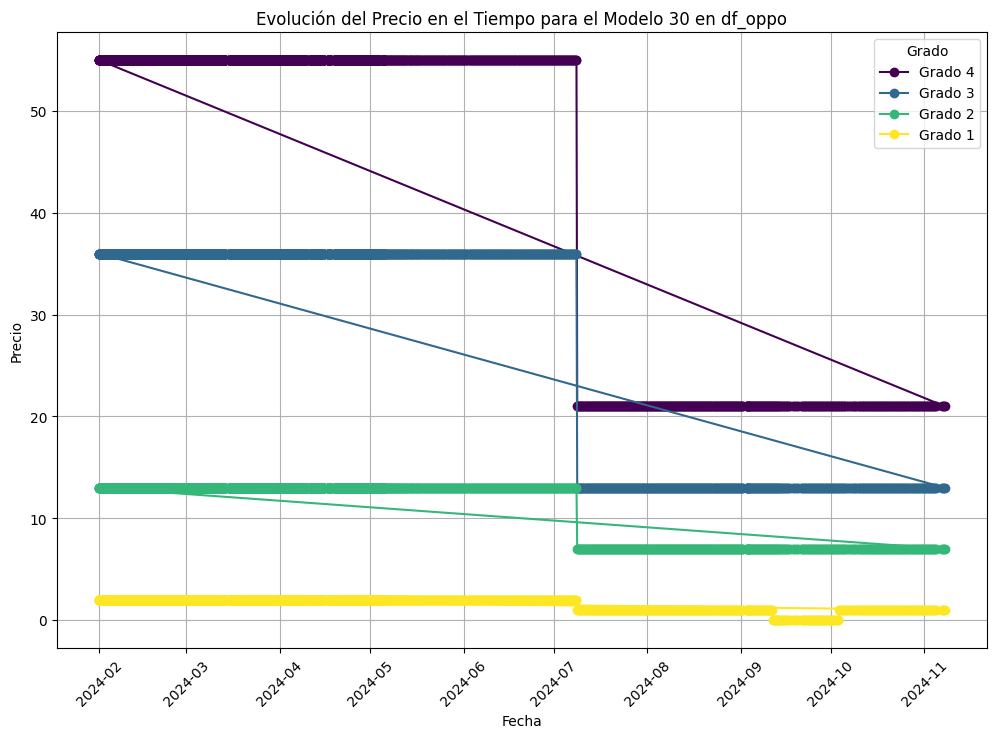

In [118]:
import matplotlib.pyplot as plt

# Verificar si el modelo 30 existe en el DataFrame
if 30 in df_oppo['Modelo'].values:
	# Filtrar el DataFrame para el modelo 30
	df_oppo_model_30 = df_oppo[df_oppo['Modelo'] == 30]

	# Crear la gráfica
	plt.figure(figsize=(12, 8))
	grades = df_oppo_model_30['Grado'].unique()
	colors = plt.cm.viridis(np.linspace(0, 1, len(grades)))

	for grade, color in zip(grades, colors):
		df_grade = df_oppo_model_30[df_oppo_model_30['Grado'] == grade]
		plt.plot(df_grade['Fecha'], df_grade['Precio'], marker='o', linestyle='-', color=color, label=f'Grado {grade}')

	plt.title('Evolución del Precio en el Tiempo para el Modelo 30 en df_oppo')
	plt.xlabel('Fecha')
	plt.ylabel('Precio')
	plt.grid(True)
	plt.xticks(rotation=45)
	plt.legend(title='Grado')
	plt.show()
else:
	print("El modelo 30 no existe en el DataFrame df_oppo.")

In [119]:
# Cargar el CSV
csv_filtrado4 = pd.read_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado4_trade_in.csv', sep=';', encoding='latin-1')

# Obtener todos los precios únicos y ordenarlos
precios_unicos = sorted(csv_filtrado4['Precio'].unique())

# Mostrar los precios únicos
print(f"Hay {len(precios_unicos)} precios únicos:")
precios_unicos

Hay 461 precios únicos:


[np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(30.0),
 np.float64(31.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(34.0),
 np.float64(35.0),
 np.float64(36.0),
 np.float64(37.0),
 np.float64(38.0),
 np.float64(39.0),
 np.float64(40.0),
 np.float64(41.0),
 np.float64(42.0),
 np.float64(43.0),
 np.float64(44.0),
 np.float64(44.8),
 np.float64(45.0),
 np.float64(46.0),
 np.float64(47.0),
 np.float64(48.0),
 np.float64(49.0),
 np.float64(50.0),
 np.float64(51.0),
 np

In [120]:
# Find all model numbers with prices over 400 euros
high_priced_models = csv_filtrado4[csv_filtrado4['Precio'] > 400]['Modelo'].unique()

# Load the model reference file to get model names
modelo_ref = pd.read_csv('CSV_transformaciones/CSVs_trade_in/Modelo_REF.csv', sep=';', encoding='latin-1')

# Filter the reference dataframe to only include high-priced models
high_priced_models_info = modelo_ref[modelo_ref['Modelo_NUM'].isin(high_priced_models)]

# Get some statistics for these models
model_stats = []
for model_num in high_priced_models:
    model_data = csv_filtrado4[csv_filtrado4['Modelo'] == model_num]
    max_price = model_data['Precio'].max()
    model_name = high_priced_models_info[high_priced_models_info['Modelo_NUM'] == model_num]['Modelo'].values[0] if len(high_priced_models_info[high_priced_models_info['Modelo_NUM'] == model_num]) > 0 else "Unknown"
    model_stats.append({
        'Modelo_NUM': model_num,
        'Modelo_Nombre': model_name,
        'Precio_Máximo': max_price,
        'Marca': model_data['Marca'].iloc[0],
        'Almacenamiento': model_data['Almacenamiento'].iloc[0]
    })

# Convert to DataFrame and sort by maximum price
result_df = pd.DataFrame(model_stats).sort_values('Precio_Máximo', ascending=False)

# Display the results
print(f"Se encontraron {len(high_priced_models)} modelos con precios superiores a 400 euros")
result_df

Se encontraron 15 modelos con precios superiores a 400 euros


,Modelo_NUM,Modelo_Nombre,Precio_Máximo,Marca,Almacenamiento
5,66,iPhone 15 Pro Max,746.0,Apple,512
6,67,iPhone 15 Pro,715.0,Apple,256
3,64,iPhone 15 Plus,611.0,Apple,512
1,12,iPhone 14 Pro Max,598.0,Apple,256
11,5,Galaxy Z Fold4 5G,570.0,Samsung,256
8,45,Galaxy S21+ 5G,549.0,Samsung,256
4,65,iPhone 15,534.0,Apple,512
14,35,iPhone 13 Pro Max,520.0,Apple,256
9,87,Galaxy S24,514.0,Samsung,256
0,9,iPhone 14 Pro,500.0,Apple,256


Estadísticas de precios del iPhone 13:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8168\3652022709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_13['Fecha'] = pd.to_datetime(iphone_13['Fecha'])



    Grado  Almacenamiento  Precio Medio  Precio Mínimo  Precio Máximo  \
0       1             128     10.050273            7.0           12.0   
1       1             256     11.046948            7.0           13.0   
2       1             512     13.263982            7.0           14.0   
3       2             128     69.748634           58.0           85.0   
4       2             256     73.802456           64.0           93.0   
5       2             512     99.899329           71.0          104.0   
6       3             128    186.871038          153.0          195.0   
7       3             256    195.584326          169.0          202.0   
8       3             512    192.422819          189.0          194.0   
9       4             128    290.981056          236.0          300.0   
10      4             256    303.136511          261.0          310.0   
11      4             512    299.105145          292.0          321.0   

    Desviación Estándar  Cantidad de Registros  


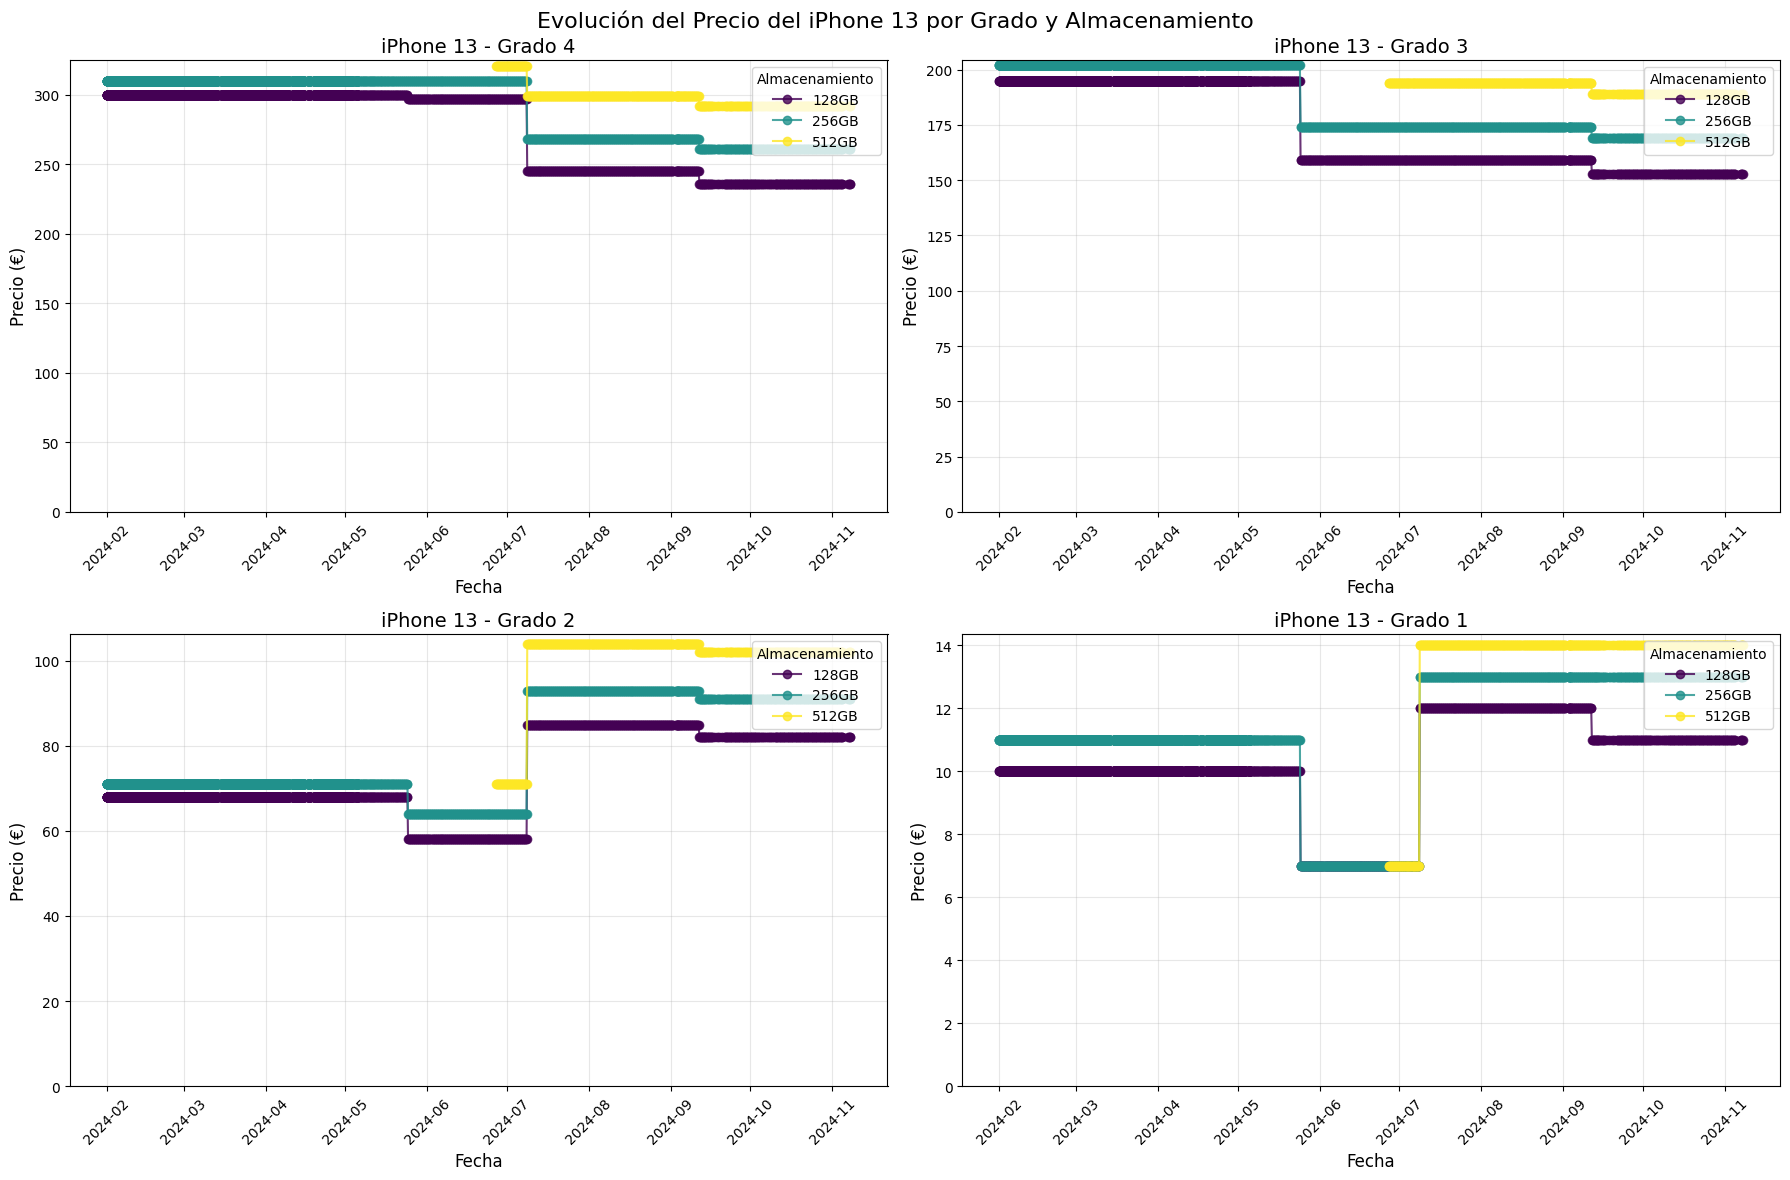

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for iPhone 13 (model 3)
iphone_13 = csv_filtrado4[csv_filtrado4['Modelo'] == 3]

# Convert date column to datetime
iphone_13['Fecha'] = pd.to_datetime(iphone_13['Fecha'])

# Sort by date
iphone_13 = iphone_13.sort_values('Fecha')

# Create figure with multiple subplots (one for each grade)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Color palette for storage capacities
colors = plt.cm.viridis(np.linspace(0, 1, len(iphone_13['Almacenamiento'].unique())))
storage_color_map = dict(zip(sorted(iphone_13['Almacenamiento'].unique()), colors))

# Plot each grade in separate subplot
for i, grade in enumerate([4, 3, 2, 1]):
    ax = axes[i]
    grade_data = iphone_13[iphone_13['Grado'] == grade]
    
    for storage, group in grade_data.groupby('Almacenamiento'):
        group = group.sort_values('Fecha')
        ax.plot(group['Fecha'], group['Precio'], 
                marker='o', linestyle='-', label=f'{storage}GB', 
                color=storage_color_map[storage], alpha=0.8)
    
    ax.set_title(f'iPhone 13 - Grado {grade}', fontsize=14)
    ax.set_ylabel('Precio (€)', fontsize=12)
    ax.set_xlabel('Fecha', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)
    
    # Add legend
    ax.legend(title='Almacenamiento', loc='upper right')

# Add an overall title
plt.suptitle('Evolución del Precio del iPhone 13 por Grado y Almacenamiento', fontsize=16)
plt.tight_layout()

# Calculate summary statistics
summary = iphone_13.groupby(['Grado', 'Almacenamiento']).agg({
    'Precio': ['mean', 'min', 'max', 'std', 'count']
}).reset_index()

summary.columns = ['Grado', 'Almacenamiento', 'Precio Medio', 'Precio Mínimo', 
                  'Precio Máximo', 'Desviación Estándar', 'Cantidad de Registros']

print("Estadísticas de precios del iPhone 13:")
print(summary.sort_values(['Grado', 'Almacenamiento']))

plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8168\2785860470.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_12['Fecha'] = pd.to_datetime(iphone_12['Fecha'])


Estadísticas de precios del iPhone 12:
    Grado  Almacenamiento  Precio Medio  Precio Mínimo  Precio Máximo  \
0       1              64      6.183201            5.0            8.0   
1       1             128      7.023559            5.0            8.0   
2       1             256      7.262482            5.0           10.0   
3       2              64     41.566256           39.0           56.0   
4       2             128     46.488220           44.0           61.0   
5       2             256     50.608664           47.0           71.0   
6       3              64    110.465243          100.0          112.0   
7       3             128    123.505256          110.0          126.0   
8       3             256    134.388767          129.0          135.0   
9       4              64    170.735337          154.0          173.0   
10      4             128    190.596955          170.0          194.0   
11      4             256    206.148678          199.0          207.0   

    Desviac

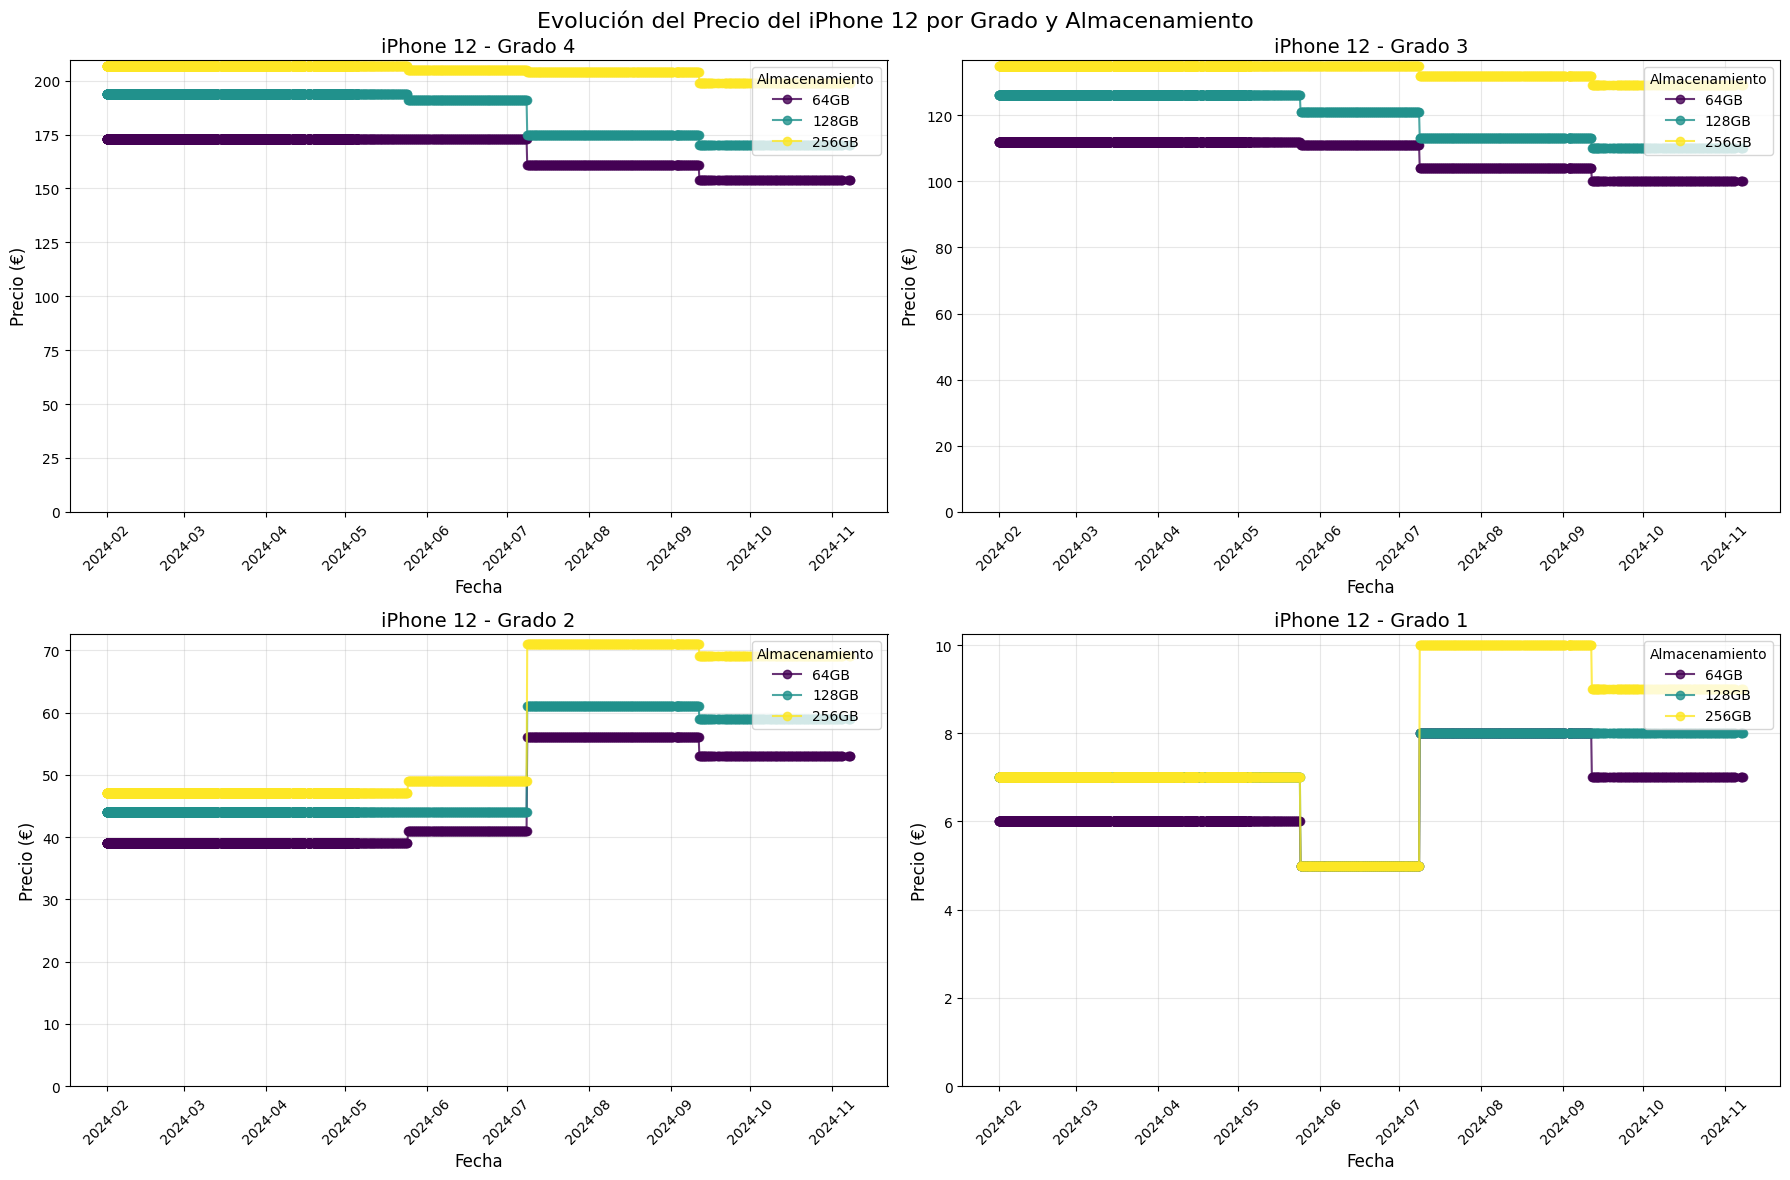

In [122]:
csv_filtrado4 = pd.read_csv('CSV_transformaciones/CSVs_trade_in/CSV_Filtrado4_trade_in.csv', sep=';', encoding='latin-1')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Filter data for iPhone 12 (model 22)
iphone_12 = csv_filtrado4[csv_filtrado4['Modelo'] == 22]

# Convert date column to datetime
iphone_12['Fecha'] = pd.to_datetime(iphone_12['Fecha'])

# Sort by date
iphone_12 = iphone_12.sort_values('Fecha')

# Create figure with multiple subplots (one for each grade)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Color palette for storage capacities
colors = plt.cm.viridis(np.linspace(0, 1, len(iphone_12['Almacenamiento'].unique())))
storage_color_map = dict(zip(sorted(iphone_12['Almacenamiento'].unique()), colors))

# Plot each grade in separate subplot
for i, grade in enumerate([4, 3, 2, 1]):
    ax = axes[i]
    grade_data = iphone_12[iphone_12['Grado'] == grade]
    
    for storage, group in grade_data.groupby('Almacenamiento'):
        group = group.sort_values('Fecha')
        ax.plot(group['Fecha'], group['Precio'], 
                marker='o', linestyle='-', label=f'{storage}GB', 
                color=storage_color_map[storage], alpha=0.8)
    
    ax.set_title(f'iPhone 12 - Grado {grade}', fontsize=14)
    ax.set_ylabel('Precio (€)', fontsize=12)
    ax.set_xlabel('Fecha', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)
    
    # Add legend
    ax.legend(title='Almacenamiento', loc='upper right')

# Add an overall title
plt.suptitle('Evolución del Precio del iPhone 12 por Grado y Almacenamiento', fontsize=16)
plt.tight_layout()

# Calculate summary statistics
summary = iphone_12.groupby(['Grado', 'Almacenamiento']).agg({
    'Precio': ['mean', 'min', 'max', 'std', 'count']
}).reset_index()

summary.columns = ['Grado', 'Almacenamiento', 'Precio Medio', 'Precio Mínimo', 
                  'Precio Máximo', 'Desviación Estándar', 'Cantidad de Registros']

print("Estadísticas de precios del iPhone 12:")
print(summary.sort_values(['Grado', 'Almacenamiento']))

plt.show()